In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('Prostate_Cancer.xls')

In [3]:
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [5]:
df['diagnosis_result']=le.fit_transform(df['diagnosis_result'])

In [6]:
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,1,23,12,151,954,0.143,0.278,0.242,0.079
1,2,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,1,14,16,78,386,0.070,0.284,0.260,0.097
4,5,1,9,19,135,1297,0.141,0.133,0.181,0.059


<Axes: >

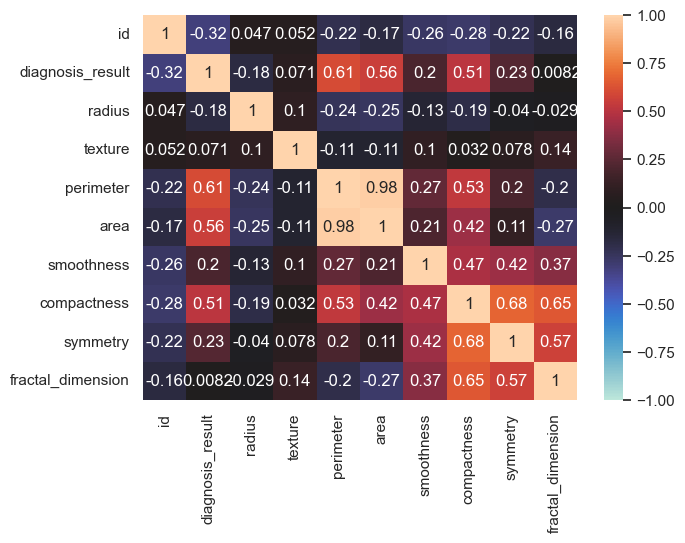

In [7]:

sns.set(rc={'figure.figsize':(7,5)})
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,center=0)

In [8]:
X=df.loc[:,['compactness','perimeter','area']].values
y=df.iloc[:,1].values

## train test split

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

## standard scaler


In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [11]:
X_train=sc.fit_transform(X_train)
X_test =sc.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()

In [13]:
reg.fit(X_train,y_train)

LogisticRegression()

In [14]:
y_pred=reg.predict(X_test)

In [15]:
y_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1])

In [16]:
y_test

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1])

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion_matrix(y_test,y_pred)

array([[ 4,  0],
       [ 2, 19]], dtype=int64)

In [19]:
28/30

0.9333333333333333

In [20]:
print(reg.score(X_test,y_test))

0.92
